In [1]:
from tifffile import imsave, imread
import glob
from timeit import default_timer as timer
import os.path
import logging
from skimage.io import imshow, imread
import argparse
import io
import json
import os
import re
import csv
import subprocess
from PIL import Image
from math import sqrt, exp, log
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
import micasense.metadata as metadata
from datetime import datetime, timedelta
import pytz
import pandas as pd
import yaml
from glob import glob
from shutil import rmtree, copyfile
import seaborn as sns

In [2]:
# CHECK if analysis made sense - plot analysis files
config_file_name = "pipeline_settings.yaml"
with open(config_file_name, 'r') as stream:
    pipeline_config = yaml.safe_load(stream)
root_flights_folder = pipeline_config['root_thermal_2019_folder']
flight_paths = glob(root_flights_folder + '*/')
analysis_array = []

for flight_name in flight_paths:
    analysis_file = glob(os.path.join(flight_name, 'analysis') + '/*.csv')[0]
    print(analysis_file)
    analysis_df = pd.read_csv(analysis_file)
    analysis_df['flight'] = os.path.splitext(os.path.split(analysis_file)[1])[0][:-17]
    analysis_array.append(analysis_df)
    
commulative_analysis = pd.concat(analysis_array)

Z:/Home/GROUP MEMBERS/Rafael/Analyses/Ketura Solar/Drone/July 2019/Ketura July 2019 drone/thermal\20072019_1330\analysis\20072019_1330_thermal_analysis.csv
Z:/Home/GROUP MEMBERS/Rafael/Analyses/Ketura Solar/Drone/July 2019/Ketura July 2019 drone/thermal\18072019_0815\analysis\18072019_0815_thermal_analysis.csv
Z:/Home/GROUP MEMBERS/Rafael/Analyses/Ketura Solar/Drone/July 2019/Ketura July 2019 drone/thermal\21072019_0940\analysis\21072019_0940_thermal_analysis.csv
Z:/Home/GROUP MEMBERS/Rafael/Analyses/Ketura Solar/Drone/July 2019/Ketura July 2019 drone/thermal\14072019_1000\analysis\14072019_1000_thermal_analysis.csv
Z:/Home/GROUP MEMBERS/Rafael/Analyses/Ketura Solar/Drone/July 2019/Ketura July 2019 drone/thermal\22072019_1345\analysis\22072019_1345_thermal_analysis.csv
Z:/Home/GROUP MEMBERS/Rafael/Analyses/Ketura Solar/Drone/July 2019/Ketura July 2019 drone/thermal\19072019_1600\analysis\19072019_1600_thermal_analysis.csv
Z:/Home/GROUP MEMBERS/Rafael/Analyses/Ketura Solar/Drone/July 20

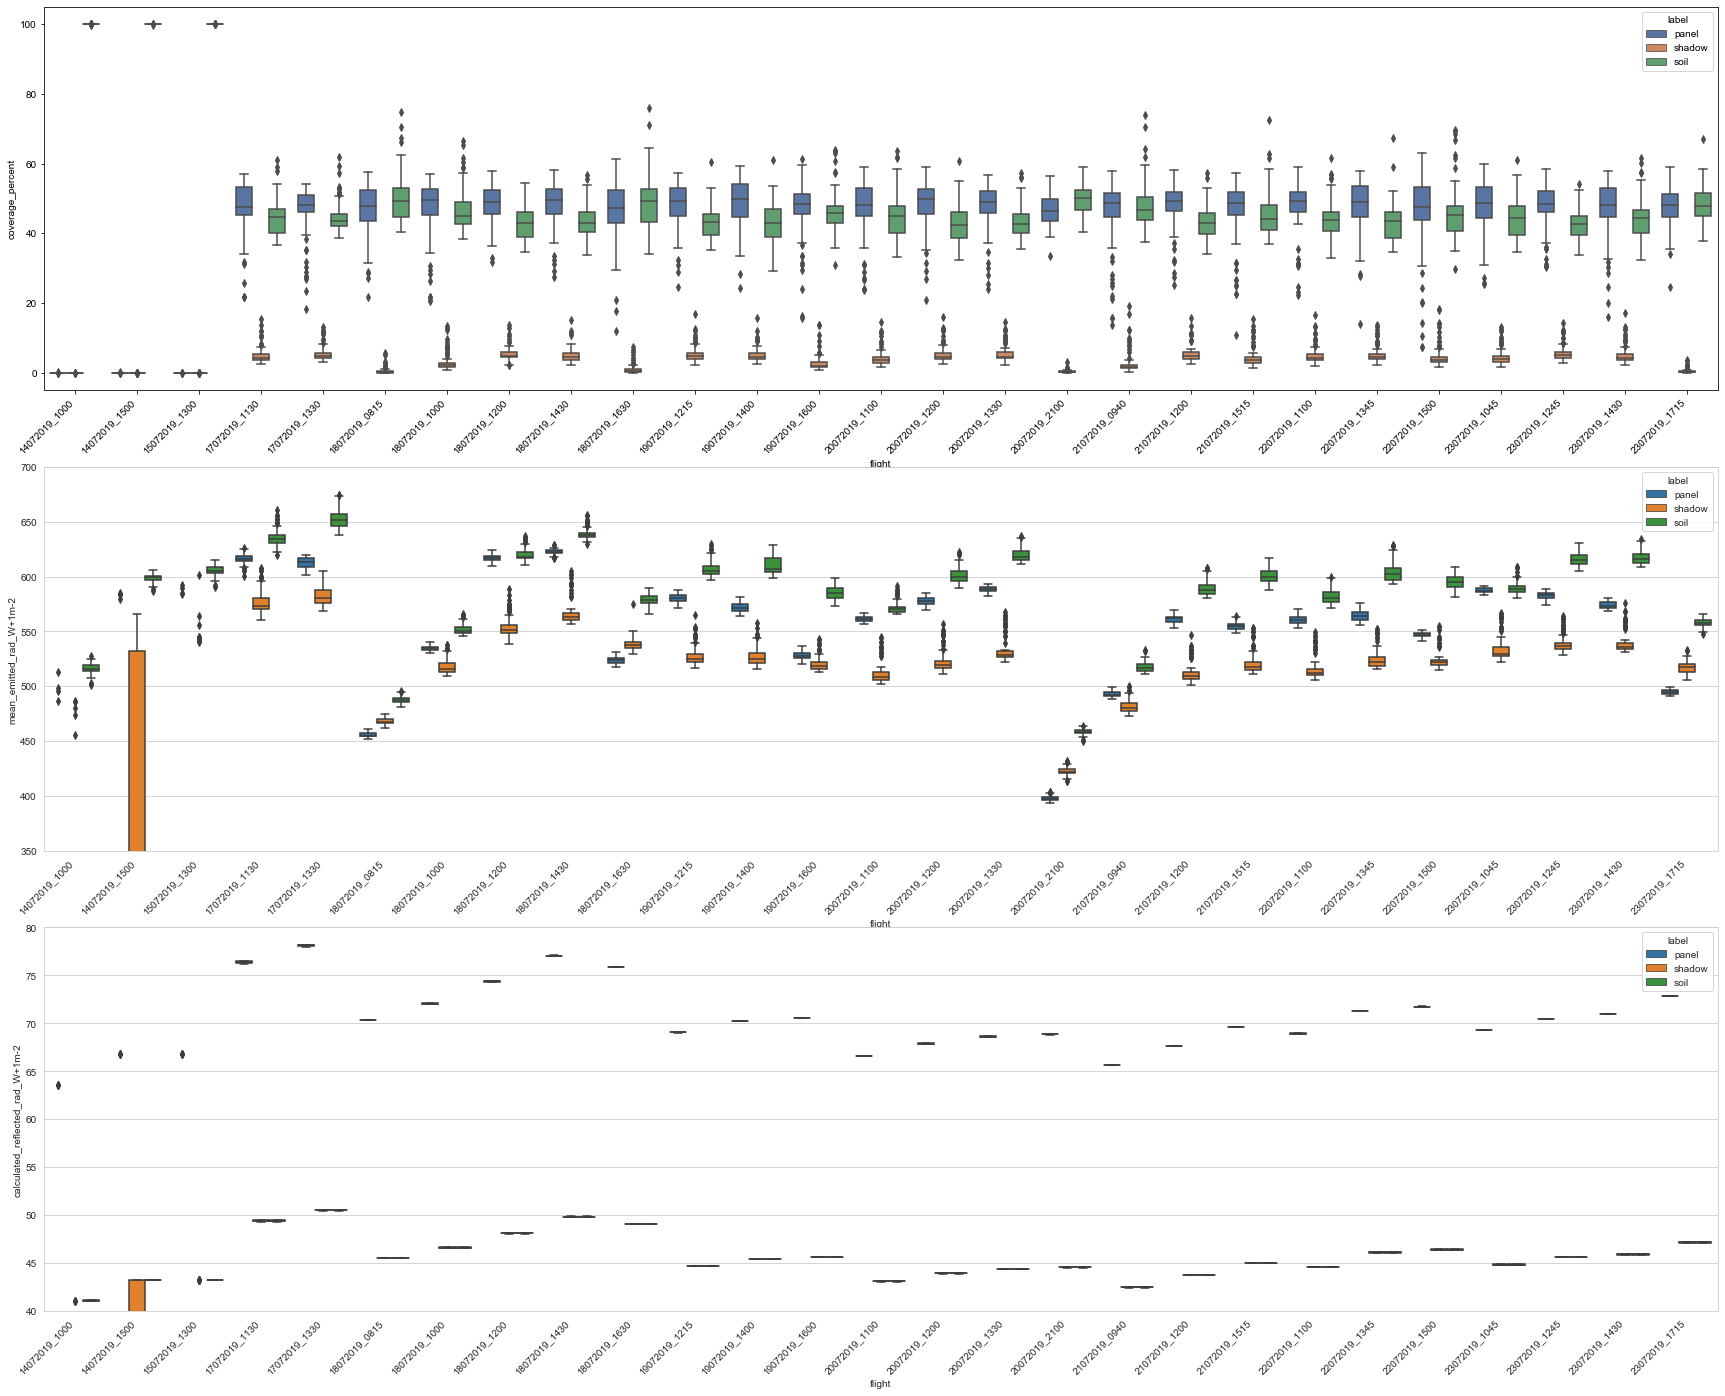

In [3]:
plt.figure(figsize=(30,24))
plt.subplot(3,1,1)
chart = sns.boxplot(
            data=commulative_analysis,
            x='flight',
            y='coverage_percent',
            hue='label', palette="deep");
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set_style("whitegrid")

plt.subplot(3,1,2)
chart = sns.boxplot(
            data=commulative_analysis,
            x='flight',
            y='mean_emitted_rad_W+1m-2',
            hue='label');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(350, 700);

plt.subplot(3,1,3)
chart = sns.boxplot(
            data=commulative_analysis,
            x='flight',
            y='calculated_reflected_rad_W+1m-2',
            hue='label');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(40, 80);
plt.savefig('2019_big_picture_analysis.png', dpi=300)

In [4]:
from datetime import datetime

In [5]:
commulative_analysis['date_time'] = pd.to_datetime(commulative_analysis['date_time'], format='%Y:%m:%d %H:%M:%S')
commulative_analysis['date_time'] = [datetime.timestamp(i) for i in commulative_analysis['date_time']]
mean_comm = commulative_analysis.groupby(['flight', 'label']).agg(np.mean)
mean_comm['date_time'] = [datetime.fromtimestamp(i) for i in mean_comm['date_time'] ]

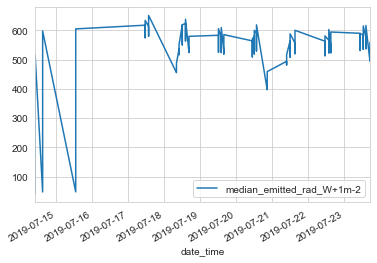

In [6]:
mean_comm.plot('date_time', 'median_emitted_rad_W+1m-2')

Text(0.5, 1.0, 'July 2019 - Thermal data')

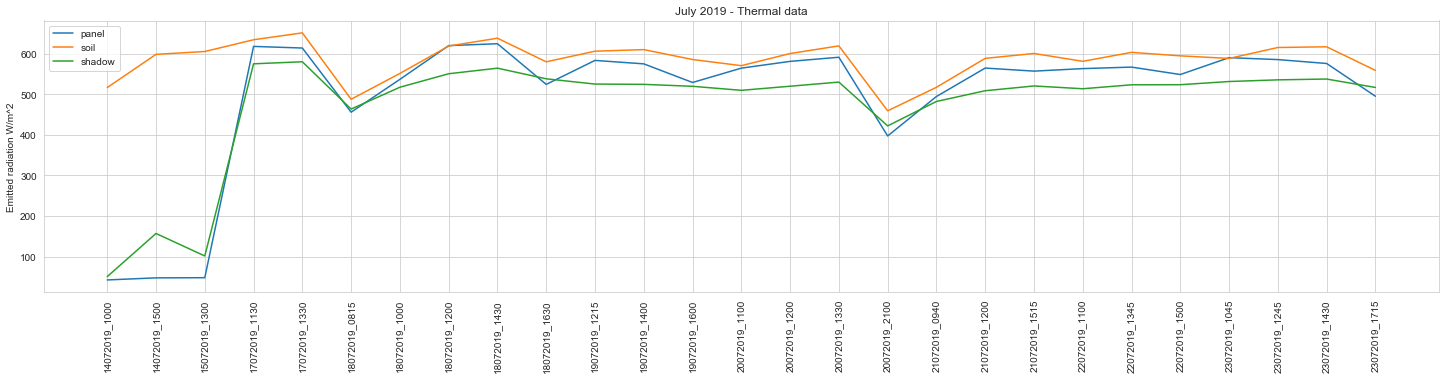

In [7]:
panel_df = mean_comm.reset_index()[mean_comm.reset_index()['label'] == 'panel']
soil_df = mean_comm.reset_index()[mean_comm.reset_index()['label'] == 'soil']
shadow_df = mean_comm.reset_index()[mean_comm.reset_index()['label'] == 'shadow']
plt.figure(figsize=(25,5))
plt.plot(panel_df['flight'], panel_df['median_emitted_rad_W+1m-2'])
plt.plot(soil_df['flight'], soil_df['median_emitted_rad_W+1m-2'])
plt.plot(shadow_df['flight'], shadow_df['median_emitted_rad_W+1m-2'])
plt.xticks(shadow_df['flight'],shadow_df['flight'], rotation='vertical');
plt.legend(['panel', 'soil', 'shadow'])
plt.ylabel('Emitted radiation W/m^2')
plt.title('July 2019 - Thermal data')

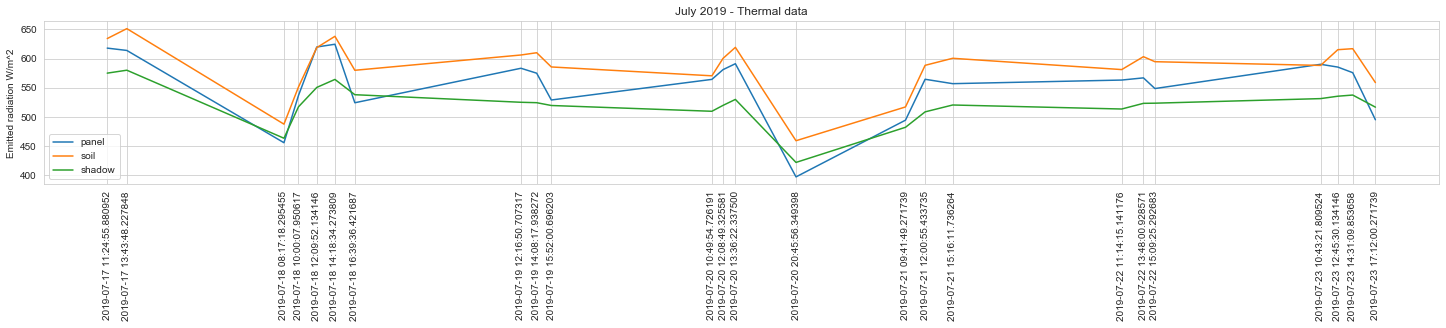

In [8]:
panel_df = mean_comm.reset_index()[mean_comm.reset_index()['label'] == 'panel'][3:]
soil_df = mean_comm.reset_index()[mean_comm.reset_index()['label'] == 'soil'][3:]
shadow_df = mean_comm.reset_index()[mean_comm.reset_index()['label'] == 'shadow'][3:]
plt.figure(figsize=(25,3))
plt.plot(panel_df['date_time'], panel_df['median_emitted_rad_W+1m-2'])
plt.plot(soil_df['date_time'], soil_df['median_emitted_rad_W+1m-2'])
plt.plot(shadow_df['date_time'], shadow_df['median_emitted_rad_W+1m-2'])
plt.xticks(shadow_df['date_time'],shadow_df['date_time'], rotation='vertical');
plt.legend(['panel', 'soil', 'shadow'])
plt.ylabel('Emitted radiation W/m^2')
plt.title('July 2019 - Thermal data')
plt.savefig('July_2019_Thermal_data.svg', bbox_inches ='tight')